# CIR

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng, SeedSequence

In [3]:
sq = SeedSequence()
rng = default_rng(sq)

In [4]:
from scheme import *
from errors import *

# Strong errors

In [5]:
params = {
    'x0': 1,
    'a': 1,
    'k': 1,
    # "sigma": np.sqrt(3) bug implicit3
    'sigma': 1,
    'T':1,
    'lambdaa': 1/8
    
}
schemaTypes = ["implicit_3", "implicit_4", "E_lambda", "E_0", "E_lambda", "Diop", "D-D"]

In [6]:
scheme = CIR(**params)

In [7]:
step_width = np.linspace(0.0001,0.01,20)
steps = np.round(1/step_width).astype(int)

In [8]:
steps = [100*i for i in range(1,20)]
result_strong_error = pd.DataFrame(index= steps)
result_strong_error['step_width'] = 1/result_strong_error.index
for type in schemaTypes:
    result_strong_error[type] = strong_error(scheme, scheme_type= type, steps= steps)[:,0]

<Axes: xlabel='step_width'>

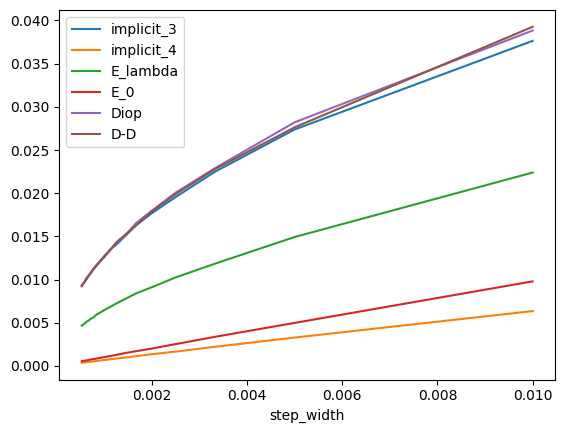

In [9]:
result_strong_error.set_index(['step_width']).plot()

## Speed convergence


In [10]:
params = {
    'x0': 0,
    'a': 1,
    'k': 1,
    # "sigma": np.sqrt(3) bug implicit3
    'sigma': 1,
    'T':1,
    'lambdaa': 1/8,
}

In [11]:
scheme = CIR(**params)

In [12]:
step_width = np.linspace(0.01,2.5,25)
sigma_grid = step_width**2 / 2

In [13]:
result_speed_convergence = pd.DataFrame(index=sigma_grid)
for type in schemaTypes:
    result_speed_convergence[type] = speed_convergence(scheme, type, N = 200)

c:\Users\xziru\OneDrive - Ecole Polytechnique\Paris 6\période 2\projet Monte-Carlos\project-Monte-Carlo\scheme.py:25: RuntimeWarning: invalid value encountered in sqrt
  val = ((self.sigma*dW[n-1] + np.sqrt(self.sigma**2 * (dW[n-1])**2 + 4 * (x[n-1] + (self.a - 0.5*self.sigma**2)*h) * (1 + self.k*h)))/(2*(1+self.k*h))) ** 2
c:\Users\xziru\OneDrive - Ecole Polytechnique\Paris 6\période 2\projet Monte-Carlos\project-Monte-Carlo\scheme.py:36: RuntimeWarning: invalid value encountered in sqrt
  val = ((0.5*self.sigma*dW[n-1] + np.sqrt(x[n-1]) + np.sqrt((0.5*self.sigma * dW[n-1] + np.sqrt(x[n-1]))**2 + 4 * ((self.a*0.5 - 0.125*self.sigma**2)*h) * (1 + 0.5*self.k*h)))/(2*(1+ 0.5*self.k*h))) ** 2


KeyboardInterrupt: 

<Axes: >

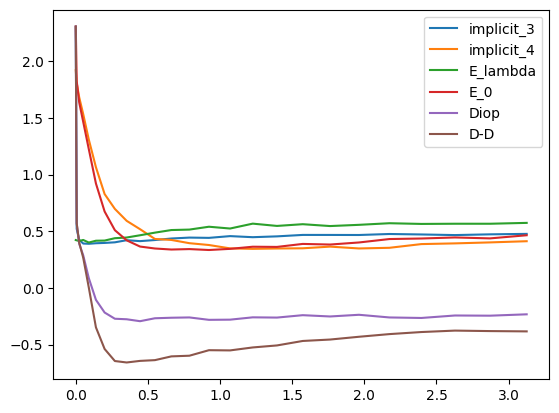

In [ ]:
result_speed_convergence.plot()

# weak errors

In [14]:
params = {
    'x0': 0,
    'a': 1,
    'k': 1,
    # "sigma": np.sqrt(3) bug implicit3
    'sigma': 1,
    'T':1,
    'lambdaa': 1/8,
}

In [15]:
scheme = CIR(**params)

In [16]:
step_width = np.linspace(0.001,0.1,20)
steps = np.round(1/step_width).astype(int)

In [20]:
result_weak_error = pd.DataFrame(index= steps)
result_weak_error['step_width'] = 1/result_weak_error.index
for type in schemaTypes:
    result_weak_error[type] = weak_error(lambda x: (5 + 3*x**4)/(2 + 5*x),scheme, scheme_type= type, steps= steps,M = 100000)[:,1]

<Axes: xlabel='step_width'>

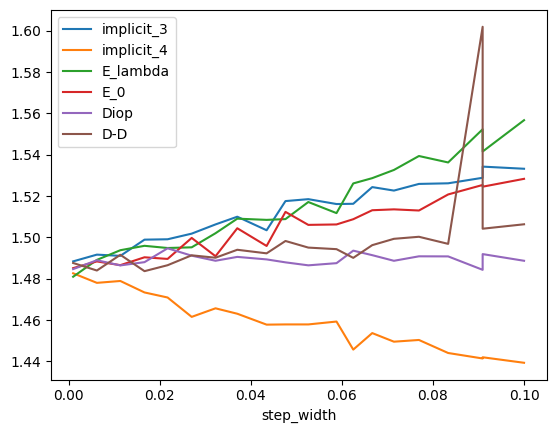

In [21]:
result_weak_error.set_index(['step_width']).plot()